#### Hammerhead ribozyme logic gate sequences:

Source of sequences: https://www.nature.com/articles/nbt1155

Computational design and experimental validationof oligonucleotide-sensing allosteric ribozymes

* Template logic gate: GGGCGACCCUGAUGAGCUUGAGUUU(X)16-22AUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
* YES Gate: GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
* NOT Gate: GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
* AND Gate: GGGCGACCCUGAUGAGCUUGAGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAAGACAAU
* OR Gate: GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU


In [11]:
import sqlite3
conn = sqlite3.connect('my_logic_gate.db')
c = conn.cursor()

In [20]:
c.execute('''DROP TABLE riboswitches''')

In [21]:
c.execute(""" CREATE TABLE riboswitches (name TEXT, 
                                         seq TEXT, 
                                         startOBS1 INT, 
                                         endOBS1 INT, 
                                         startOBS2 INT, 
                                         endOBS2 INT, 
                                         startRED1 INT, 
                                         endRED1 INT, 
                                         startRED2 INT, 
                                         endRED2 INT);""")



In [22]:
c.execute("""INSERT INTO riboswitches (name,
                                        seq,
                                        startOBS1,
                                        endOBS1,
                                        startRED1,
                                        endRED1,
                                        startRED2,
                                        endRED2)
                        VALUES ('YES-1',
                                'GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC',
                                26,
                                47,
                                16,
                                21,
                                49,
                                54)
                                
        ;""")

c.execute("""INSERT INTO riboswitches (name,
                                        seq,
                                        startOBS1,
                                        endOBS1,
                                        startRED1,
                                        endRED1,
                                        startRED2,
                                        endRED2)
                        VALUES ("NOT-1",
                                "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC",
                                44,
                                66,
                                40,
                                44,
                                74,
                                77)
                                
        ;""")

c.execute("""INSERT INTO riboswitches (name,
                                        seq,
                                        startOBS1,
                                        endOBS1,
                                        startOBS2,
                                        endOBS2,
                                        startRED1,
                                        endRED1,
                                        startRED2,
                                        endRED2)
                        VALUES ("AND-1",
                                "GGGCGACCCUGAUGAGCUUGAGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC",
                                30,
                                45,
                                49,
                                64,
                                16,
                                23,
                                70,
                                77)
                                
        ;""")
c.execute("""INSERT INTO riboswitches (name,
                                        seq,
                                        startOBS1,
                                        endOBS1,
                                        startOBS2,
                                        endOBS2,
                                        startRED1,
                                        endRED1,
                                        startRED2,
                                        endRED2)
                        VALUES ("OR-1",
                                "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU",
                                27,
                                46,
                                47,
                                66,
                                16,
                                26,
                                67,
                                77)
                                
        ;""")
conn.commit()

Running RNAfold as a subprocess:

In [24]:
import subprocess

seqs = \
'''
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
GGGCGACCCUGAUGAGCUUGAGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
'''

p = subprocess.run(['/Users/clairedubin/anaconda3/pkgs/viennarna-2.4.9-py36hd28b015_0/bin/RNAfold'], 
                  input=bytes(seqs, 'ascii'),
                  stdout=subprocess.PIPE,
                  stderr=subprocess.PIPE)

print('output:')
print(p.stdout.decode())

output:
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.(((((((((.......))))))))).((.((.(((...))).))))..(((((....))))).)))))))) (-33.00)
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((.......((((......))))...((((((.((((..(((......)))..)))).)))))).))))))....)))) (-28.10)
GGGCGACCCUGAUGAGCUUGAGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((....(((.....(((.(((.......))).))).....)))..))))))).))))).....(((((....))))).)))))))) (-40.20)
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((((.(((.....(((.(((.......))).))).)))...)).))))))).))))).....(((((....))))).))))))))......... (-41.70)



Plot of YES gate with default settings:


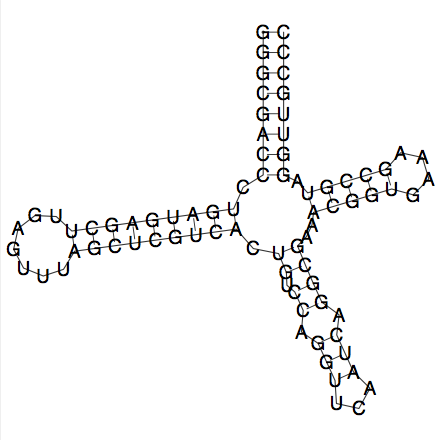

Plot of YES gate from paper:
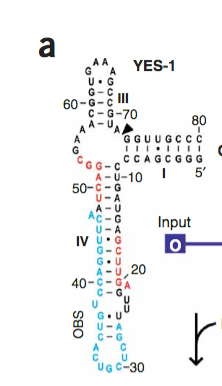

Default settings give a structure with 3 stem loops, while paper gives 2 stem loops. One of the stem loops from the paper's structures is very long, while the stem loop from the default setting has shorter loops. The red regions are bound to each other in this structure, which is not what the paper predicts.

At temperature of 5C, the simulated structure looks more similar to the paper (2 stem loops with similar base pairing and the red regions are not bound to each other. The first red region is bound to the blue region):
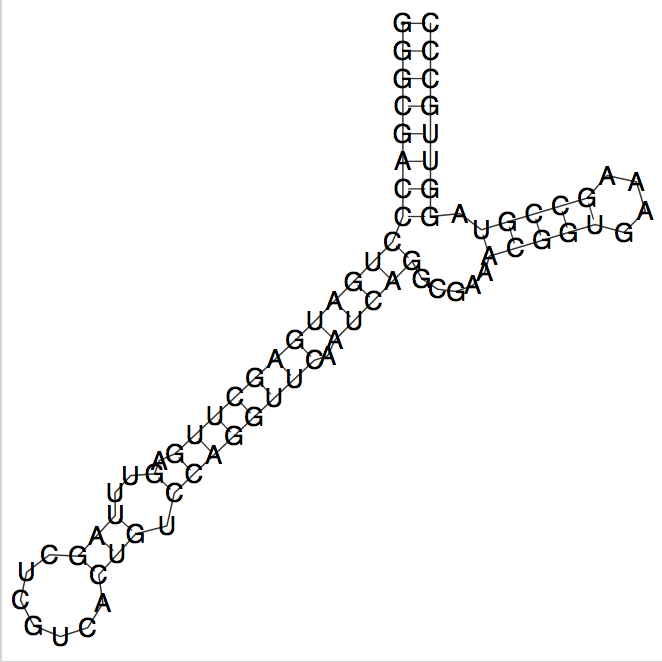

Plot of NOT gate with default settings. The red regions are bound to each other:
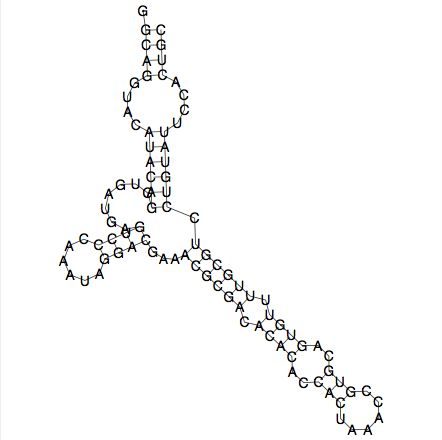

Plot of NOT gate from paper:
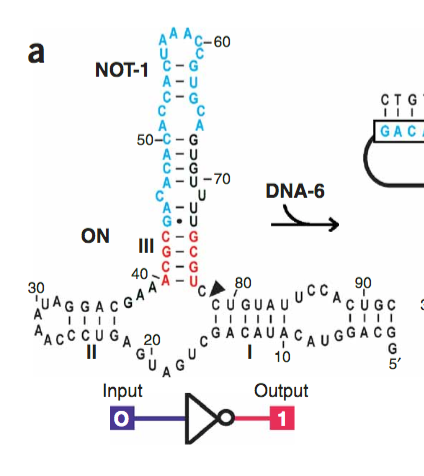

The simulated structure with default parameters has an extra bulge where the stem loops meet compared to the structure in the paper, but at a temperature of 5 the extra bulge is smaller, as shown below. The red regions are still bound to each other.

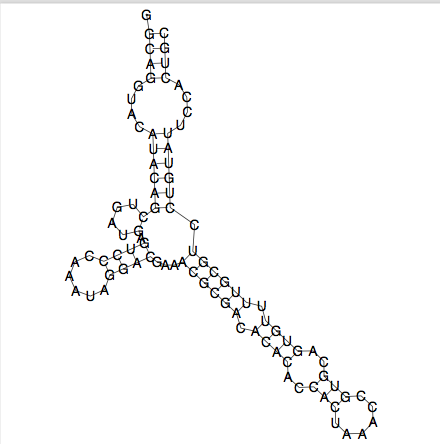


Plot of AND gate with default settings. The red regions are not bound to each other:

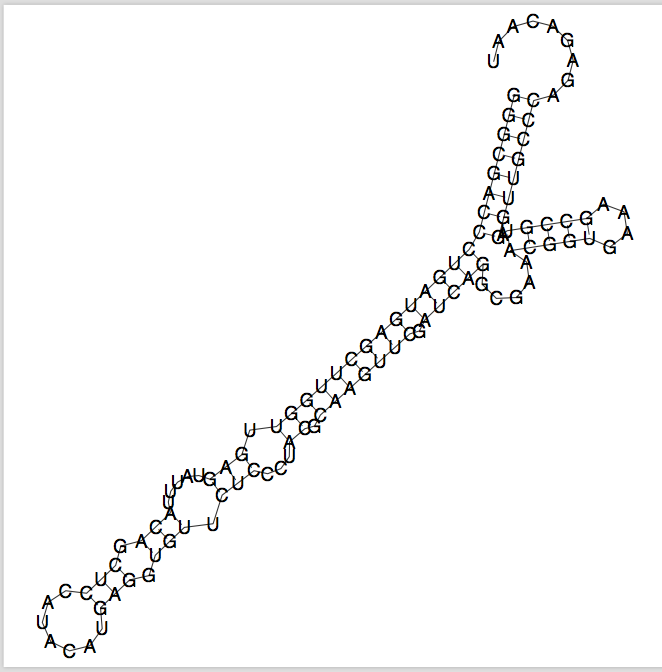

Plot of AND gate from paper:
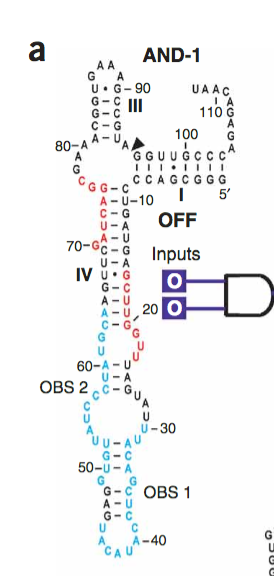

The structure of the AND gate from the default settings are already nearly identical, but the paper shows a larger bulge at the intersection of the 'T" shape. This is due to one structure having a GC bond at one end of the bulge while the other has a different GC bond at the other end. Default parameters use a temperature of 37C.

Plot of OR gate with default settings. The red regions are not bound to each other:
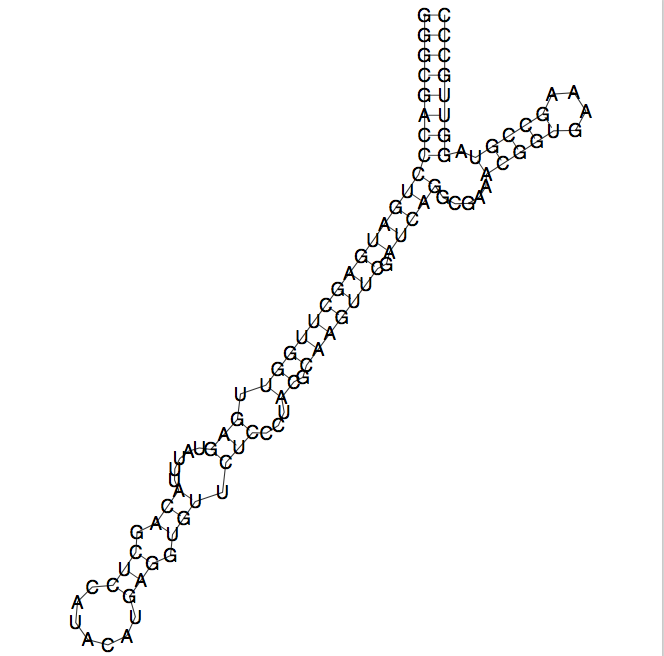

Plot of OR gate from paper:
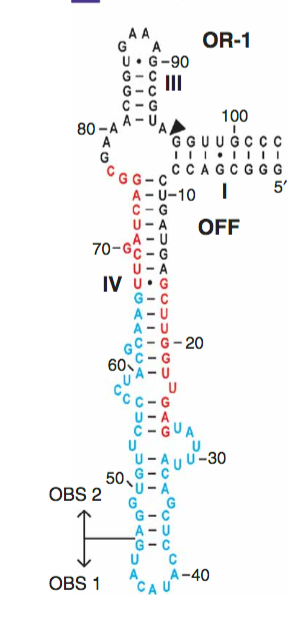

The plot from the default parameters is identical to the structure in the paper, as far as I can tell. Default parameters use a temperature of 37C.


YES-1 OBS bound to target:
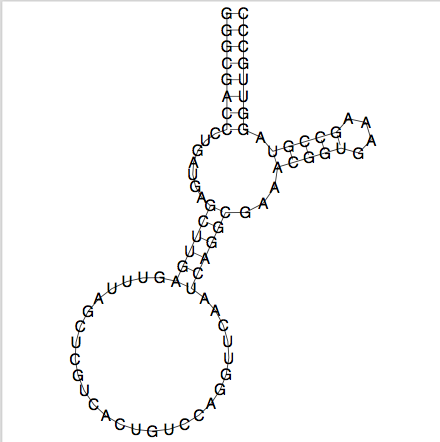

The red regions are bound to each other, and the OBS sequence is not bound to anything (available to bind to target DNA). The simulation behaves as the paper says it would.

NOT-1 Constrained:
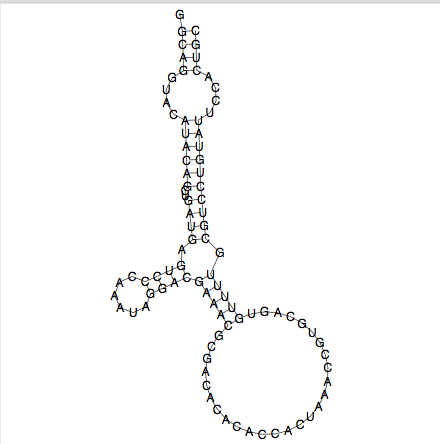

The red regions are not bound to each other, but the first red region in the simulation is not bound to anything, while the paper predicts it will be bound to a non-red region of the stem loop. The blue region is available to bind to the target DNA, so functionally the switch should work as the paper describes, even if the simulation structure is a bit different.

AND-1, first OBS constrained: Red regions not bound to each other, OBS1 open to target sequence but OBS2 partially bound. Behaves as paper expects, with a few minor structural differences.
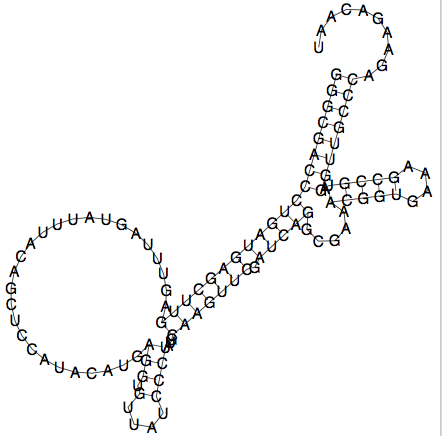

AND-1, second OBS constrained. Red regions ARE bound to each other but, OBS1 is not available to bind target and OBS2 is available. Swith will be on (not expected):
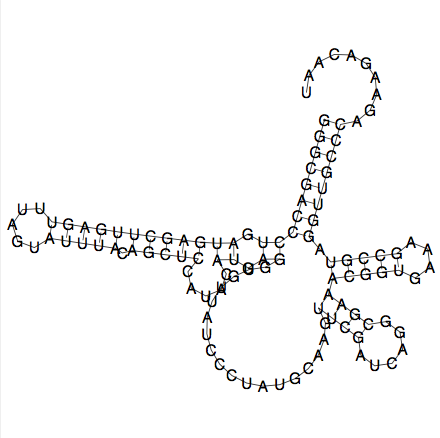

AND-1, both OBSs constrained. Red regions are bound to each other and both OBSs are available to bind target DNA. Behaves as expected.:
    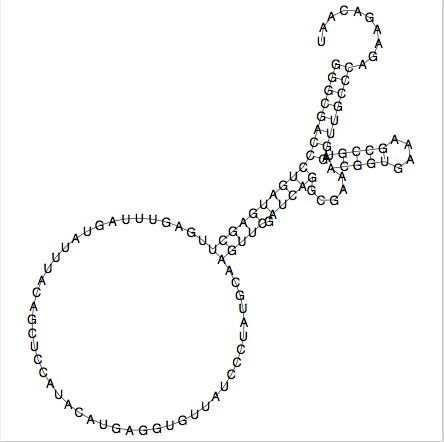

Truth Table for AND:

(OBS1/OBS2)

T/T: ON

T/F: OFF

F/T: ON

F/F: OFF 

AND does not behave as the paper says it will - it will be ON if OBS2 is constrained but OBS1 is not.

OR-1, first OBS constrained. Red regions bound to each other, switch is ON:
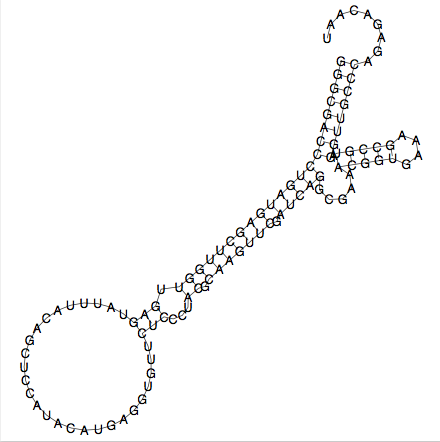

OR-1, second OBS constrained. Red regions bound to each other, switch is ON:
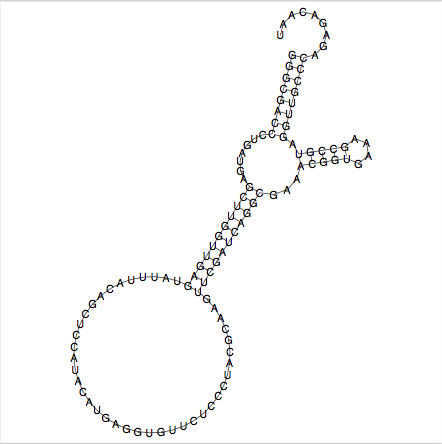

OR-1, both OBSs constrained. Red regions are bound to each other. Switch is on:
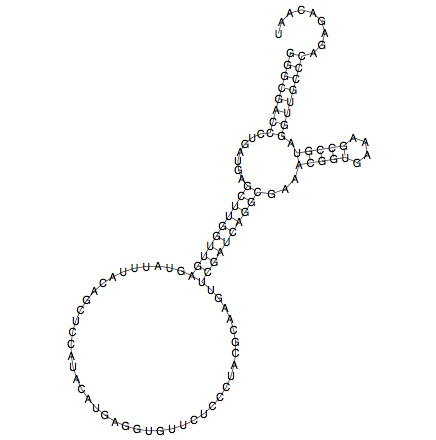

Truth Table for AND:

(OBS1/OBS2)

T/T: ON
 
T/F: ON

F/T: ON

F/F: OFF

The OR switch behaves as expected.